In [ ]:
# ----------------------------------------------------------
# Análisis básico de audio submarino (hidrófono electret)
# Autor: Pablo Arenas López
# ----------------------------------------------------------

import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import scipy.signal as sig

# 1. Cargar archivo de audio 
ruta_audio = r"G:\Hidrofono\Hidrófono\Grabaciones marina\Pradera_HaynesCay\Pradera1_223pm.wav"  # Nombre del archivo
y, sr = librosa.load(ruta_audio, sr=None)  # sr=None conserva la tasa original

print(f"Duración: {len(y)/sr:.2f} s  |  Frecuencia de muestreo: {sr} Hz")

Duración: 308.60 s  |  Frecuencia de muestreo: 48000 Hz


In [ ]:
# === 1.5 Recorte para igualar duración (# minutos deseados)

duracion_deseada = 160  # 2:40 minutos en segundos
muestras_deseadas = int(duracion_deseada * sr)

duracion_actual = len(y) / sr
print(f"Duración original: {duracion_actual:.2f} s")

if len(y) > muestras_deseadas:
    # Corta desde el final hacia atrás para conservar lo más reciente
    y = y[-muestras_deseadas:]
    print("✔ Recorte aplicado (se eliminó el inicio).")
else:
    # Si es más corto:
    print("✔ No se recortó: la grabación es más corta que 5 min.")

print(f"Duración final: {len(y)/sr:.2f} s")


Duración original: 308.60 s
✔ Recorte aplicado (se eliminó el inicio).
Duración final: 160.00 s


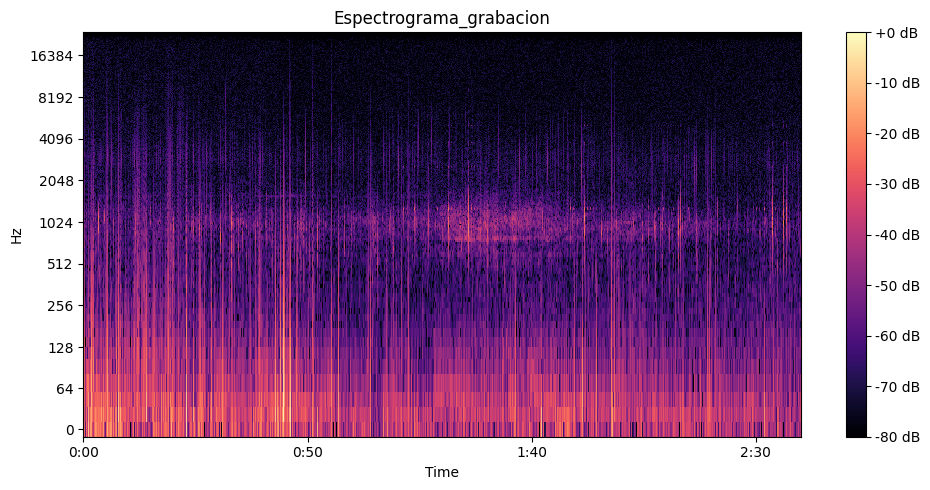

✅ Figura guardada en: G:\Hidrofono\Hidrófono\Ventanas_2\Pradera\espectrograma_grabaciónPradera1_223pm.png


In [ ]:
#  2. Visualizar el espectrograma 
import os

# Crea el espectrograma
S = np.abs(librosa.stft(y, n_fft=2048, hop_length=512))
S_db = librosa.amplitude_to_db(S, ref=np.max)

# Carpeta para guardar las figuras generadas
carpeta_figuras = r"G:\Hidrofono\Hidrófono\Ventanas_2\Pradera"
os.makedirs(carpeta_figuras, exist_ok=True)

# Genera nombre del archivo de salida segun el nombre del arch de audio
nombre_figura = "espectrograma_grabación" + os.path.splitext(os.path.basename(ruta_audio))[0] + ".png"
ruta_salida = os.path.join(carpeta_figuras, nombre_figura)

# Visualización y guardado
plt.figure(figsize=(10, 5))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title("Espectrograma_grabacion")
plt.tight_layout()
plt.savefig(ruta_salida, dpi=300)
plt.show()

print(f"✅ Figura guardada en: {ruta_salida}")


Nivel RMS promedio: -45.94 dB re 1 µPa (relativo)


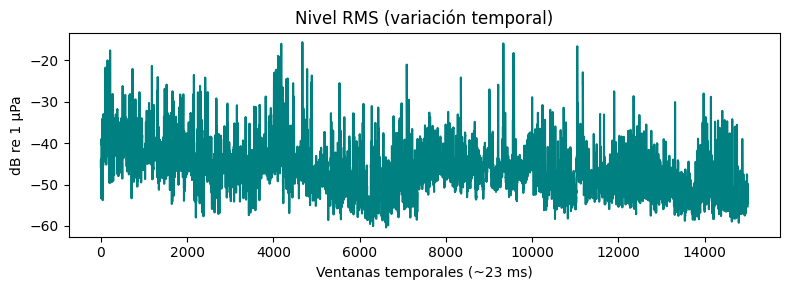

✅ Figura RMS guardada en: G:\Hidrofono\Hidrófono\Ventanas_2\Pradera\RMS_Nombre_GrabacionPradera1_223pm.png


In [ ]:
# 3. Calcular RMS (nivel medio en dB)
import os

rms = librosa.feature.rms(y=y)[0]
rms_db = 20 * np.log10(rms + 1e-6)
print(f"Nivel RMS promedio: {np.mean(rms_db):.2f} dB re 1 µPa (relativo)")

# Carpeta de salida
carpeta_figuras = r"G:\Hidrofono\Hidrófono\Ventanas_2\Pradera"
os.makedirs(carpeta_figuras, exist_ok=True)

# Nombre basado en el archivo de audio
nombre_RMS = "RMS_Nombre_Grabacion" + os.path.splitext(os.path.basename(ruta_audio))[0] + ".png"
ruta_salida_RMS = os.path.join(carpeta_figuras, nombre_RMS)

# Gráfico
plt.figure(figsize=(8, 3))
plt.plot(rms_db, color='teal')
plt.title("Nivel RMS (variación temporal)")
plt.xlabel("Ventanas temporales (~23 ms)")
plt.ylabel("dB re 1 µPa")
plt.tight_layout()
plt.savefig(ruta_salida_RMS, dpi=300)
plt.show()

print(f"✅ Figura RMS guardada en: {ruta_salida_RMS}")


In [ ]:
# 4. Separar por bandas de frecuencia: Físico, Humano, Biológico

# Rango físico: < 300 Hz 
# Rango humano: 300–1000 Hz
# Rango biológico: > 1000 Hz

# Ruido físico
b_fis, a_fis = sig.butter(4, 300/(sr/2), btype='low')
y_fisico = sig.filtfilt(b_fis, a_fis, y)

# Ruido humano 
b_hum, a_hum = sig.butter(4, [300/(sr/2), 1000/(sr/2)], btype='band')
y_humano = sig.filtfilt(b_hum, a_hum, y)

# Ruido biológico 
b_bio, a_bio = sig.butter(4, 1000/(sr/2), btype='high')
y_biologico = sig.filtfilt(b_bio, a_bio, y)


In [ ]:
# 5. Calcular RMS de cada banda 
# Se calcula el valor RMS (Root Mean Square) de cada componente de ruido
# Convertido a decibelios (dB) para comparación logarítmica

rms_fisico = 20 * np.log10(np.sqrt(np.mean(y_fisico**2)) + 1e-6)
rms_humano = 20 * np.log10(np.sqrt(np.mean(y_humano**2)) + 1e-6)
rms_biologico = 20 * np.log10(np.sqrt(np.mean(y_biologico**2)) + 1e-6)
rms_total = 20 * np.log10(np.sqrt(np.mean(y**2)) + 1e-6)

print(f"RMS ruido físico (<500Hz): {rms_fisico:.2f} dB")
print(f"RMS ruido humano (500–2000Hz): {rms_humano:.2f} dB")
print(f"RMS ruido biológico (>2000Hz): {rms_biologico:.2f} dB")
print(f"RMS total: {rms_total:.2f} dB")


RMS ruido físico (<500Hz): -38.90 dB
RMS ruido humano (500–2000Hz): -51.35 dB
RMS ruido biológico (>2000Hz): -53.56 dB
RMS total: -38.39 dB


✅ Tabla CSV guardada en: G:\Hidrofono\Hidrófono\Ventanas_2\Pradera\RMS_promedios.csv


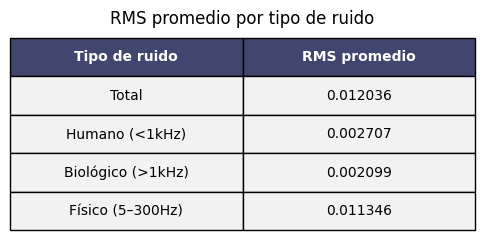

✅ Figura de RMS guardada en: G:\Hidrofono\Hidrófono\Ventanas_2\Pradera\RMS_promedios.png


In [ ]:
# 6. Calcular y guardar RMS promedio por tipo de ruido 
import pandas as pd
from matplotlib.table import Table

# Función RMS
def rms(signal):
    return np.sqrt(np.mean(np.square(signal)))

# Cálculo de RMS para cada tipo de señal
rms_humano = rms(y_humano)
rms_biologico = rms(y_biologico)
rms_fisico = rms(y_fisico)
rms_total = rms(y)

# Crear tabla de resultados
data = {
    "Tipo de ruido": ["Total", "Humano (<1kHz)", "Biológico (>1kHz)", "Físico (5–300Hz)"],
    "RMS promedio": [rms_total, rms_humano, rms_biologico, rms_fisico]
}
df = pd.DataFrame(data)

# Guardar como CSV 
ruta_csv = os.path.join(carpeta_figuras, "RMS_promedios.csv")
df.to_csv(ruta_csv, index=False)
print(f"✅ Tabla CSV guardada en: {ruta_csv}")

# Guardar como figura 
fig, ax = plt.subplots(figsize=(6, 2.5))
ax.axis('off')

tabla = Table(ax, bbox=[0, 0, 1, 1])
n_rows, n_cols = df.shape
col_labels = list(df.columns)

# Agregar encabezados
for j, label in enumerate(col_labels):
    cell = tabla.add_cell(0, j, width=0.5, height=0.3, text=label, loc='center', facecolor="#40466e")
    cell.get_text().set_color('white')
    cell.get_text().set_weight('bold')

# Agregar filas
for i in range(n_rows):
    for j in range(n_cols):
        texto = f"{df.iloc[i, j]:.6f}" if j == 1 else df.iloc[i, j]
        tabla.add_cell(i+1, j, width=0.5, height=0.3, text=texto, loc='center', facecolor='#f2f2f2')

ax.add_table(tabla)
plt.title("RMS promedio por tipo de ruido", fontsize=12, pad=10)

# Guardar figura
ruta_figura = os.path.join(carpeta_figuras, "RMS_promedios.png")
plt.savefig(ruta_figura, dpi=300, bbox_inches='tight')
plt.show()

print(f"✅ Figura de RMS guardada en: {ruta_figura}")


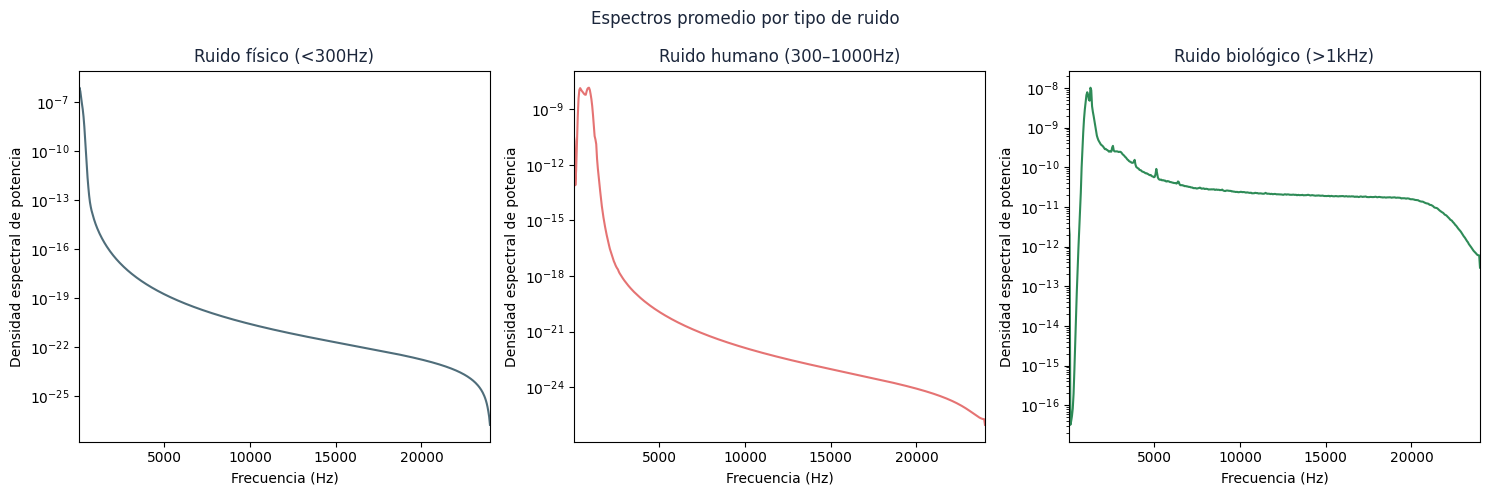

✅ Figura de espectros guardada en: G:\Hidrofono\Hidrófono\Ventanas_2\Pradera\EspectroPromedio_Pradera1_223pm.png


In [ ]:
# 7. Espectros promedios 
from scipy import signal as sig
import os
import matplotlib.pyplot as plt

# Paleta de colores
colores = {
    "profundo": "#1B263B",   # azul oscuro para títulos
    "medio": "#2E8B57",      # verde medio (biológico)
    "coral": "#E57373",      # coral (humano)
    "azulprof": "#4F6D7A"    # azul grisáceo (físico)
}

def plot_spectrum(signal, sr, title, color):
    freqs, psd = sig.welch(signal, sr, nperseg=1024)
    plt.semilogy(freqs, psd, color=color)
    plt.title(title, color=colores["profundo"])
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Densidad espectral de potencia')
    plt.xlim(10, sr/2)
    plt.tight_layout()

# Carpeta de salida
carpeta_figuras = r"G:\Hidrofono\Hidrófono\Ventanas_2\Pradera"
os.makedirs(carpeta_figuras, exist_ok=True)

# Nombre único basado en el archivo de audio
nombre_EP = "EspectroPromedio_" + os.path.splitext(os.path.basename(ruta_audio))[0] + ".png"
ruta_salida_EP = os.path.join(carpeta_figuras, nombre_EP)

# Gráficos lado a lado (3 espectros)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_spectrum(y_fisico, sr, "Ruido físico (<300Hz)", color=colores["azulprof"])

plt.subplot(1, 3, 2)
plot_spectrum(y_humano, sr, "Ruido humano (300–1000Hz)", color=colores["coral"])

plt.subplot(1, 3, 3)
plot_spectrum(y_biologico, sr, "Ruido biológico (>1kHz)", color=colores["medio"])

plt.suptitle("Espectros promedio por tipo de ruido", color=colores["profundo"])
plt.tight_layout()
plt.savefig(ruta_salida_EP, dpi=300)
plt.show()

print(f"✅ Figura de espectros guardada en: {ruta_salida_EP}")


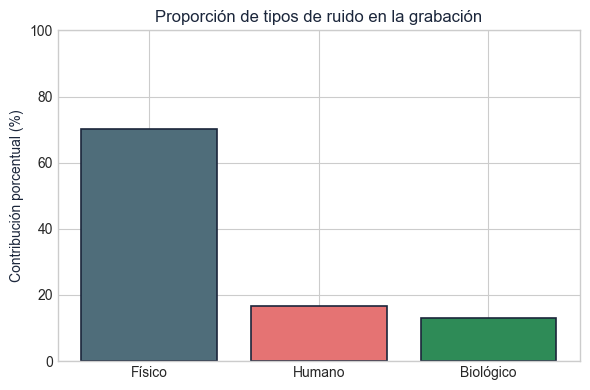

✅ Figura guardada en: G:\Hidrofono\Hidrófono\Ventanas_2\Pradera\Porcentaje_Ruido_Pradera1_223pm_153029.png


In [ ]:

# 8. Proporción de tipos de ruido y gráfico de barras 

import time 

rms_vals = np.array([rms_fisico, rms_humano, rms_biologico])
if np.all(rms_vals == 0):
    porc_fisico = porc_humano = porc_biologico = 0
else:
    sum_rms = np.sum(rms_vals)
    porc_fisico = 100 * rms_fisico / sum_rms
    porc_humano = 100 * rms_humano / sum_rms
    porc_biologico = 100 * rms_biologico / sum_rms

etiquetas = ['Físico', 'Humano', 'Biológico']
porcentajes = [porc_fisico, porc_humano, porc_biologico]
colores_barras = [colores["azulprof"], colores["coral"], colores["medio"]]

# Estilo claro
with plt.style.context('seaborn-v0_8-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.bar(etiquetas, porcentajes, color=colores_barras, edgecolor=colores["profundo"], linewidth=1.2)
    plt.ylabel('Contribución porcentual (%)', color=colores["profundo"])
    plt.title('Proporción de tipos de ruido en la grabación', color=colores["profundo"])
    plt.ylim(0, 100)
    plt.tight_layout()

    # Guardar con timestamp
    timestamp = time.strftime("%H%M%S")
    nombre_figura = f"Porcentaje_Ruido_{os.path.splitext(os.path.basename(ruta_audio))[0]}_{timestamp}.png"
    plt.savefig(os.path.join(carpeta_figuras, nombre_figura), dpi=300)
    plt.show()

print(f"✅ Figura guardada en: {os.path.join(carpeta_figuras, nombre_figura)}")


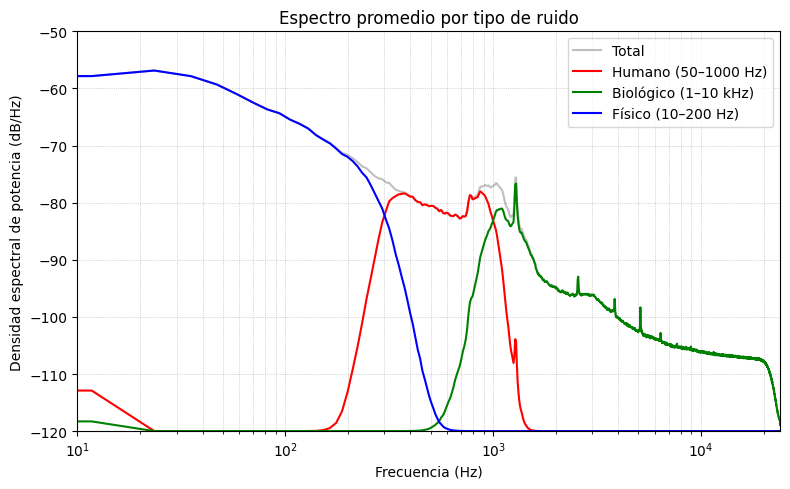

In [ ]:
# 9. Análisis espectral comparativo 
from scipy.signal import welch

plt.figure(figsize=(8, 5))

# Calcular la densidad espectral de potencia (PSD) para cada banda
freqs_total, psd_total = welch(y, sr, nperseg=4096)
freqs_hum, psd_hum = welch(y_humano, sr, nperseg=4096)
freqs_bio, psd_bio = welch(y_biologico, sr, nperseg=4096)
freqs_fis, psd_fis = welch(y_fisico, sr, nperseg=4096)

# Convierte a dB (añadiendo un mínimo para evitar log(0))
plt.semilogx(freqs_total, 10 * np.log10(psd_total + 1e-12), color='gray', alpha=0.5, label='Total')
plt.semilogx(freqs_hum, 10 * np.log10(psd_hum + 1e-12), color='red', label='Humano (50–1000 Hz)')
plt.semilogx(freqs_bio, 10 * np.log10(psd_bio + 1e-12), color='green', label='Biológico (1–10 kHz)')
plt.semilogx(freqs_fis, 10 * np.log10(psd_fis + 1e-12), color='blue', label='Físico (10–200 Hz)')

plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad espectral de potencia (dB/Hz)")
plt.title("Espectro promedio por tipo de ruido")
plt.xlim(10, sr / 2)
plt.legend()
plt.grid(True, which='both', linestyle=':', linewidth=0.5)
plt.ylim(-120, -50)
plt.tight_layout()

# Guarda el espectro comparativo
nombre_figura = "EspectroComparativo_" + os.path.splitext(os.path.basename(ruta_audio))[0] + ".png"
plt.savefig(os.path.join(carpeta_figuras, nombre_figura), dpi=300)
plt.show()


In [ ]:
# 10. Análisis por ventanas temporales 

duracion_ventana = 30  # segundos
muestras_ventana = int(duracion_ventana * sr)

n_ventanas = len(y) // muestras_ventana
print(f"Número de ventanas analizadas: {n_ventanas}")

Número de ventanas analizadas: 5


In [77]:
#división de audio en ventanas
def dividir_en_ventanas(signal, muestras_ventana):
    ventanas = []
    for i in range(0, len(signal) - muestras_ventana + 1, muestras_ventana):
        ventanas.append(signal[i:i + muestras_ventana])
    return ventanas

ventanas_total = dividir_en_ventanas(y, muestras_ventana)
ventanas_fisico = dividir_en_ventanas(y_fisico, muestras_ventana)
ventanas_humano = dividir_en_ventanas(y_humano, muestras_ventana)
ventanas_biologico = dividir_en_ventanas(y_biologico, muestras_ventana)


In [78]:
#RMS por ventana
def rms_db(x):
    return 20 * np.log10(np.sqrt(np.mean(x**2)) + 1e-6)

rms_total_w = [rms_db(v) for v in ventanas_total]
rms_fisico_w = [rms_db(v) for v in ventanas_fisico]
rms_humano_w = [rms_db(v) for v in ventanas_humano]
rms_biologico_w = [rms_db(v) for v in ventanas_biologico]

In [79]:
#Resumen estadístico
def resumen(nombre, datos):
    print(f"{nombre}:")
    print(f"  Promedio: {np.mean(datos):.2f} dB")
    print(f"  Desv. estándar: {np.std(datos):.2f} dB\n")

print("=== RMS por ventanas ===\n")
resumen("Total", rms_total_w)
resumen("Físico", rms_fisico_w)
resumen("Humano", rms_humano_w)
resumen("Biológico", rms_biologico_w)


=== RMS por ventanas ===

Total:
  Promedio: -39.42 dB
  Desv. estándar: 3.64 dB

Físico:
  Promedio: -40.21 dB
  Desv. estándar: 4.12 dB

Humano:
  Promedio: -51.69 dB
  Desv. estándar: 2.09 dB

Biológico:
  Promedio: -53.86 dB
  Desv. estándar: 1.04 dB



In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# === 10. Tabla resumen RMS por ventanas (completa) ===

# Crear DataFrame
tabla_rms = pd.DataFrame({
    "Tipo de señal": ["Total", "Físico", "Humano", "Biológico"],
    "RMS promedio (dB)": [
        np.mean(rms_total_w),
        np.mean(rms_fisico_w),
        np.mean(rms_humano_w),
        np.mean(rms_biologico_w)
    ],
    "Desviación estándar (dB)": [
        np.std(rms_total_w),
        np.std(rms_fisico_w),
        np.std(rms_humano_w),
        np.std(rms_biologico_w)
    ]
})

# Mostrar tabla (opcional)
tabla_rms


,Tipo de señal,RMS promedio (dB),Desviación estándar (dB)
0,Total,-39.421532,3.642504
1,Físico,-40.209877,4.120844
2,Humano,-51.686692,2.085323
3,Biológico,-53.855697,1.044521


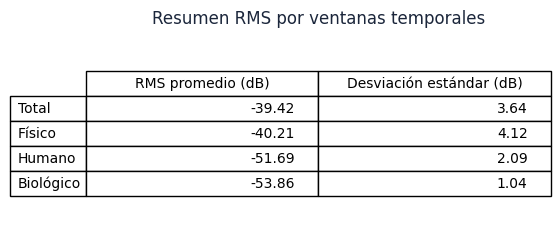

✅ Tabla guardada en: G:\Hidrofono\Hidrófono\Ventanas_2\Pradera\Tabla_RMS_Resumen_Pradera1_223pm.png


In [81]:
import matplotlib.pyplot as plt

# === 11. Guardar tabla RMS como figura ===

fig, ax = plt.subplots(figsize=(6, 2.5))
ax.axis('off')

tabla = ax.table(
    cellText=np.round(tabla_rms.iloc[:, 1:].values, 2),
    colLabels=tabla_rms.columns[1:],
    rowLabels=tabla_rms["Tipo de señal"],
    loc='center'
)

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1, 1.5)

plt.title(
    "Resumen RMS por ventanas temporales",
    color=colores["profundo"],
    pad=10
)

nombre_figura = (
    "Tabla_RMS_Resumen_" +
    os.path.splitext(os.path.basename(ruta_audio))[0] +
    ".png"
)

plt.savefig(os.path.join(carpeta_figuras, nombre_figura), dpi=300, bbox_inches="tight")
plt.show()

print(f"✅ Tabla guardada en: {os.path.join(carpeta_figuras, nombre_figura)}")


C:\Users\pealf\AppData\Local\Temp\ipykernel_16972\1637872181.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


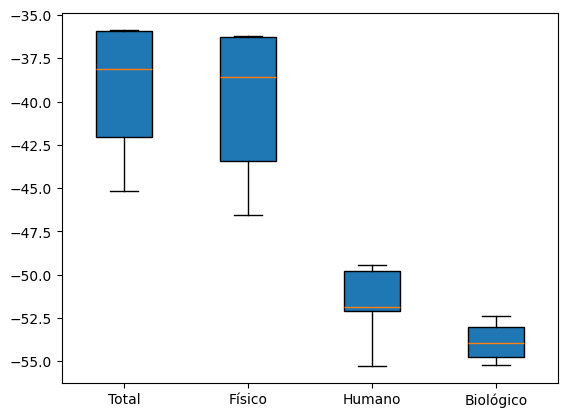

✅ Figura guardada en: G:\Hidrofono\Hidrófono\Ventanas_2\Pradera\Boxplot_RMS_Ventanas_153033.png


In [82]:
plt.boxplot(
    [rms_total_w, rms_fisico_w, rms_humano_w, rms_biologico_w],
    labels=["Total", "Físico", "Humano", "Biológico"],
    patch_artist=True
)

# === Guardar figura ===
timestamp = time.strftime("%H%M%S")
nombre_figura = f"Boxplot_RMS_Ventanas_{timestamp}.png"
ruta_figura = os.path.join(carpeta_figuras, nombre_figura)

plt.savefig(ruta_figura, dpi=300, bbox_inches="tight")
plt.show()

print(f"✅ Figura guardada en: {ruta_figura}")

In [83]:
#PSD promedio por ventana
def psd_promedio_por_ventana(signal, sr):
    psd_acum = []
    for v in signal:
        freqs, psd = sig.welch(v, sr, nperseg=2048)
        psd_acum.append(psd)
    return freqs, np.mean(psd_acum, axis=0)

freqs, psd_total_w = psd_promedio_por_ventana(ventanas_total, sr)
_, psd_fisico_w = psd_promedio_por_ventana(ventanas_fisico, sr)
_, psd_humano_w = psd_promedio_por_ventana(ventanas_humano, sr)
_, psd_biologico_w = psd_promedio_por_ventana(ventanas_biologico, sr)


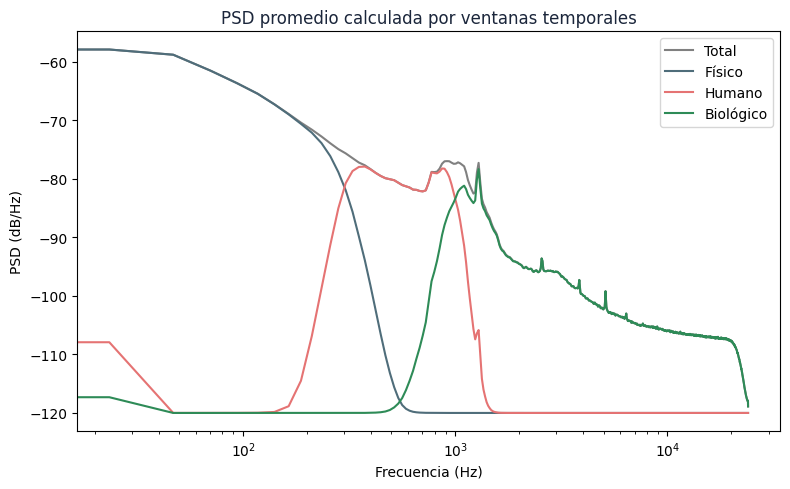

In [84]:
#Grafico PSD promedio por ventanas
plt.figure(figsize=(8, 5))
plt.semilogx(freqs, 10*np.log10(psd_total_w + 1e-12), label="Total", color="gray")
plt.semilogx(freqs, 10*np.log10(psd_fisico_w + 1e-12), label="Físico", color=colores["azulprof"])
plt.semilogx(freqs, 10*np.log10(psd_humano_w + 1e-12), label="Humano", color=colores["coral"])
plt.semilogx(freqs, 10*np.log10(psd_biologico_w + 1e-12), label="Biológico", color=colores["medio"])

plt.xlabel("Frecuencia (Hz)")
plt.ylabel("PSD (dB/Hz)")
plt.title("PSD promedio calculada por ventanas temporales", color=colores["profundo"])
plt.legend()
plt.tight_layout()
plt.show()


In [85]:
# === Porcentaje promedio de contribución por tipo de ruido (por ventanas) ===

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

# Convertir listas a arrays por seguridad
rms_fisico_w = np.array(rms_fisico_w)
rms_humano_w = np.array(rms_humano_w)
rms_biologico_w = np.array(rms_biologico_w)

# Pasar de dB a escala lineal para porcentajes
lin_fisico = 10 ** (rms_fisico_w / 20)
lin_humano = 10 ** (rms_humano_w / 20)
lin_biologico = 10 ** (rms_biologico_w / 20)

# Suma por ventana
suma_total = lin_fisico + lin_humano + lin_biologico

# Evitar divisiones por cero
suma_total[suma_total == 0] = np.nan

# Porcentaje por ventana
porc_fisico_w = 100 * lin_fisico / suma_total
porc_humano_w = 100 * lin_humano / suma_total
porc_biologico_w = 100 * lin_biologico / suma_total

# Promedios y desviaciones
resumen_porcentajes = pd.DataFrame({
    "Tipo de ruido": ["Físico", "Humano", "Biológico"],
    "Porcentaje promedio (%)": [
        np.nanmean(porc_fisico_w),
        np.nanmean(porc_humano_w),
        np.nanmean(porc_biologico_w)
    ],
    "Desv. estándar (%)": [
        np.nanstd(porc_fisico_w),
        np.nanstd(porc_humano_w),
        np.nanstd(porc_biologico_w)
    ]
})

resumen_porcentajes


,Tipo de ruido,Porcentaje promedio (%),Desv. estándar (%)
0,Físico,67.119877,8.140744
1,Humano,17.978743,2.778306
2,Biológico,14.901380,5.585838


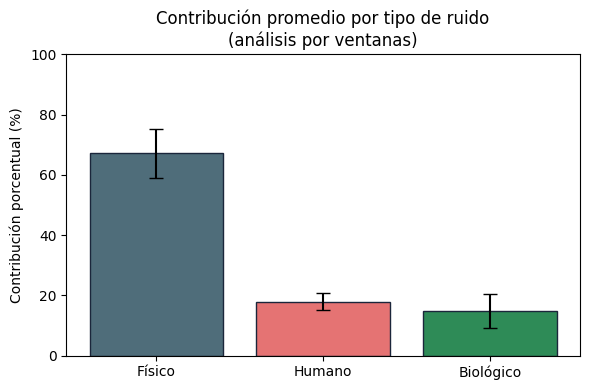

✅ Figura guardada en: G:\Hidrofono\Hidrófono\Ventanas_2\Pradera\Porcentaje_Promedio_Ventanas_153036.png


In [86]:
# === Gráfico de porcentaje promedio ===

colores = {
    "Físico": "#4F6D7A",
    "Humano": "#E57373",
    "Biológico": "#2E8B57"
}

plt.figure(figsize=(6, 4))

plt.bar(
    resumen_porcentajes["Tipo de ruido"],
    resumen_porcentajes["Porcentaje promedio (%)"],
    yerr=resumen_porcentajes["Desv. estándar (%)"],
    capsize=5,
    color=[colores[t] for t in resumen_porcentajes["Tipo de ruido"]],
    edgecolor="#1B263B"
)

plt.ylabel("Contribución porcentual (%)")
plt.title("Contribución promedio por tipo de ruido\n(análisis por ventanas)")
plt.ylim(0, 100)
plt.tight_layout()

# Guardar figura
timestamp = time.strftime("%H%M%S")
nombre_figura = f"Porcentaje_Promedio_Ventanas_{timestamp}.png"
plt.savefig(os.path.join(carpeta_figuras, nombre_figura), dpi=300)
plt.show()

print(f"✅ Figura guardada en: {os.path.join(carpeta_figuras, nombre_figura)}")
